In [68]:
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = r"C:\Users\HP\ML main\dogs_vs_cats\test"
cat_dir = os.path.join(base_dir, 'cats')
dog_dir = os.path.join(base_dir, 'dogs')

def load_images(image_dir, label):
    images = []
    labels = []
    for filename in os.listdir(image_dir):
        img_path = os.path.join(image_dir, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (150, 150))
            images.append(img)
            labels.append(label)
    return images, labels

cat_images, cat_labels = load_images(cat_dir, 0)
dog_images, dog_labels = load_images(dog_dir, 1)

images = np.array(cat_images + dog_images)
labels = np.array(cat_labels + dog_labels)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Check shapes
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")


Training data shape: (4000, 150, 150, 3)
Training labels shape: (4000,)
Test data shape: (1000, 150, 150, 3)
Test labels shape: (1000,)


In [69]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 70s 531ms/step - accuracy: 0.5241 - loss: 71.6055 - val_accuracy: 0.5350 - val_loss: 0.6830
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 65s 514ms/step - accuracy: 0.5483 - loss: 0.6905 - val_accuracy: 0.5710 - val_loss: 0.6776
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 65s 515ms/step - accuracy: 0.5651 - loss: 0.6880 - val_accuracy: 0.5590 - val_loss: 0.6844
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 65s 515ms/step - accuracy: 0.5568 - loss: 0.6859 - val_accuracy: 0.5960 - val_loss: 0.6744
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 65s 512ms/step - accuracy: 0.5640 - loss: 0.6813 - val_accuracy: 0.6000 - val_loss: 0.6641
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 65s 515ms/step - accuracy: 0.5746 - loss: 0.6775 - val_accuracy: 0.5770 - val_loss: 0.6656
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 66s 522ms/step - accuracy: 0.5894 - loss: 0.6793 - val_accuracy: 0.6210 - val_loss: 0.6608
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 65s 509ms/step - accuracy: 0.6038 - loss: 

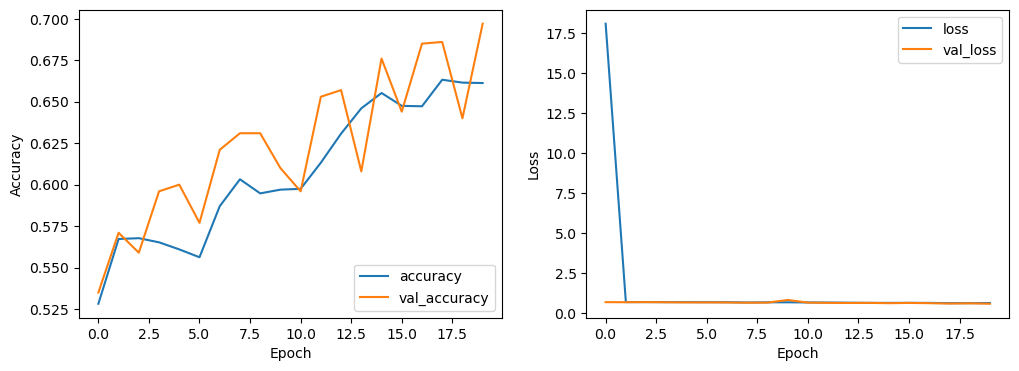

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(X_test, y_test)
)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


In [83]:
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (150, 150))
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize

    prediction = model.predict(img)
    return 'Dog' if prediction[0][0] > 0.5 else 'Cat'

# Example usage
result = predict_image(r'C:\Users\HP\ML main\dogs_vs_cats\test_cat.jpg')  # Update with your test image path
print(f'The image is classified as: {result}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The image is classified as: Cat


In [85]:
result = predict_image(r'C:\Users\HP\ML main\dogs_vs_cats\test_dog.jpg')  # Update with your test image path
print(f'The image is classified as: {result}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The image is classified as: Cat


In [87]:
result = predict_image(r'C:\Users\HP\ML main\dogs_vs_cats\test_dog2.jpg')  # Update with your test image path
print(f'The image is classified as: {result}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The image is classified as: Cat


In [89]:
result = predict_image(r'C:\Users\HP\ML main\dogs_vs_cats\test_dog3.jpg')  # Update with your test image path
print(f'The image is classified as: {result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
The image is classified as: Cat
